In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Cleaning

In [23]:
pgold = pd.read_excel('historical_data.xlsx', 'PGOLD')
aev = pd.read_excel('historical_data.xlsx', 'AEV')
phn = pd.read_excel('historical_data.xlsx', 'PHN')
secb = pd.read_excel('historical_data.xlsx', 'SECB')
mwc = pd.read_excel('historical_data.xlsx', 'MWC')

In [24]:
pgold.head()

,Date,PGOLD
0,12/29/2022,"""34.90"""
1,12/28/2022,"""34.95"""
2,12/27/2022,"""33.85"""
3,12/23/2022,"""33.90"""
4,12/22/2022,"""34.00"""


In [25]:
df = pgold.merge(aev).merge(phn).merge(secb).merge(mwc)
df.head()

,Date,PGOLD,AEV,PHN,SECB,MWC
0,12/29/2022,"""34.90""","""57.70""","""19.06""","""87.00""","""19.10"""
1,12/28/2022,"""34.95""","""57.75""","""19.00""","""88.50""","""18.50"""
2,12/27/2022,"""33.85""","""56.20""","""19.00""","""88.10""","""19.00"""
3,12/23/2022,"""33.90""","""56.80""","""19.00""","""87.80""","""18.92"""
4,12/22/2022,"""34.00""","""57.00""","""19.00""","""88.60""","""19.00"""


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1330
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1331 non-null   object
 1   PGOLD   1331 non-null   object
 2   AEV     1331 non-null   object
 3   PHN     1331 non-null   object
 4   SECB    1331 non-null   object
 5   MWC     1331 non-null   object
dtypes: object(6)
memory usage: 72.8+ KB


In [27]:
df.dtypes

Date     object
PGOLD    object
AEV      object
PHN      object
SECB     object
MWC      object
dtype: object

In [ ]:
#change the date to index
df = df.set_index('Date')

In [31]:
df.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,"""34.90""","""57.70""","""19.06""","""87.00""","""19.10"""
12/28/2022,"""34.95""","""57.75""","""19.00""","""88.50""","""18.50"""
12/27/2022,"""33.85""","""56.20""","""19.00""","""88.10""","""19.00"""
12/23/2022,"""33.90""","""56.80""","""19.00""","""87.80""","""18.92"""
12/22/2022,"""34.00""","""57.00""","""19.00""","""88.60""","""19.00"""


In [36]:
#remove double quotes and change columns to float
df = df.replace('"', '', regex=True)
df = df.apply(pd.to_numeric)
df.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,34.90,57.70,19.06,87.0,19.10
12/28/2022,34.95,57.75,19.00,88.5,18.50
12/27/2022,33.85,56.20,19.00,88.1,19.00
12/23/2022,33.90,56.80,19.00,87.8,18.92
12/22/2022,34.00,57.00,19.00,88.6,19.00


In [37]:
df.dtypes

PGOLD    float64
AEV      float64
PHN      float64
SECB     float64
MWC      float64
dtype: object

In [38]:
#compute log percentage change
daily_pct_change = df.pct_change().apply(lambda x: np.log(1+x))
daily_pct_change.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,NaN,NaN,NaN,NaN,NaN
12/28/2022,0.001432,0.000866,-0.003153,0.017094,-0.031918
12/27/2022,-0.031979,-0.027207,0.000000,-0.004530,0.026668
12/23/2022,0.001476,0.010620,0.000000,-0.003411,-0.004219
12/22/2022,0.002946,0.003515,0.000000,0.009070,0.004219


In [39]:
#log of cov matrix
cov_matrix = daily_pct_change.apply(lambda x: np.log(1+x)).cov()
cov_matrix

,PGOLD,AEV,PHN,SECB,MWC
PGOLD,0.000400,0.000105,0.000009,0.000076,0.000078
AEV,0.000105,0.000647,0.000019,0.000116,0.000082
PHN,0.000009,0.000019,0.000378,0.000036,0.000024
SECB,0.000076,0.000116,0.000036,0.000440,0.000120
MWC,0.000078,0.000082,0.000024,0.000120,0.000746


<AxesSubplot:>

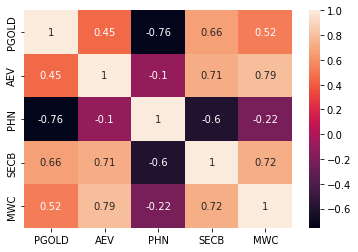

In [41]:
#check for correlation
sns.heatmap(df.corr(), annot=True)

In [42]:
#change index to datetime index as resample function is only valid with datetime index
df.index=pd.to_datetime(df.index)


# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

PGOLD   -0.067512
AEV     -0.038170
PHN      0.228759
SECB    -0.163811
MWC      0.047371
dtype: float64

In [43]:
# Try to plug in weights to compute port return
w = [0.2, 0.1, 0.2, 0.5]
port_er = sum(w[i]*ind_er.loc[ind_er.index[i]] for i in range(len(w)))
port_er

-0.053473126825500226

In [44]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

PGOLD    0.314703
AEV      0.401250
PHN      0.298714
SECB     0.332164
MWC      0.441695
dtype: float64

In [45]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets


,Returns,Volatility
PGOLD,-0.067512,0.314703
AEV,-0.038170,0.401250
PHN,0.228759,0.298714
SECB,-0.163811,0.332164
MWC,0.047371,0.441695


In [46]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 5000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [47]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [48]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 5000 portfolios created

,Returns,Volatility,PGOLD weight,AEV weight,PHN weight,SECB weight,MWC weight
0,-0.008835,0.211879,0.354146,0.286067,0.142297,0.079844,0.137646
1,0.046965,0.192850,0.350521,0.060332,0.355792,0.092399,0.140956
2,0.028275,0.190941,0.222071,0.147506,0.371463,0.228925,0.030036
3,0.060921,0.226868,0.046422,0.049188,0.342610,0.184935,0.376845
4,-0.019418,0.197726,0.234722,0.191612,0.174976,0.261250,0.137441


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

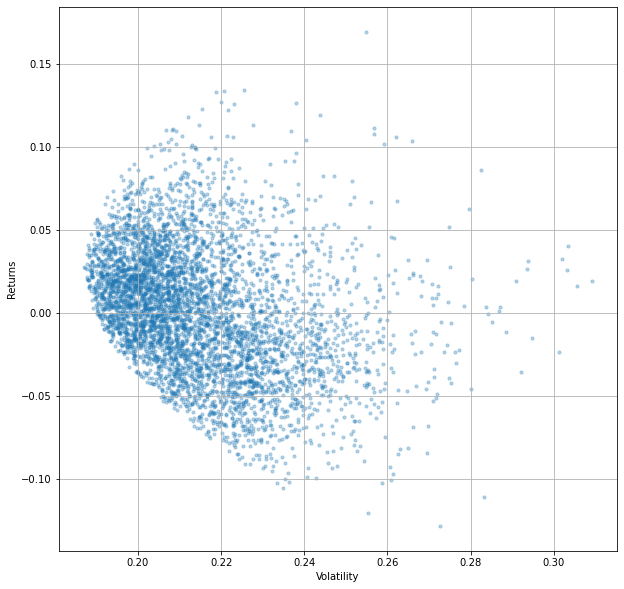

In [49]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [50]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.028171
Volatility      0.187115
PGOLD weight    0.245107
AEV weight      0.124487
PHN weight      0.332458
SECB weight     0.192708
MWC weight      0.105240
Name: 2747, dtype: float64

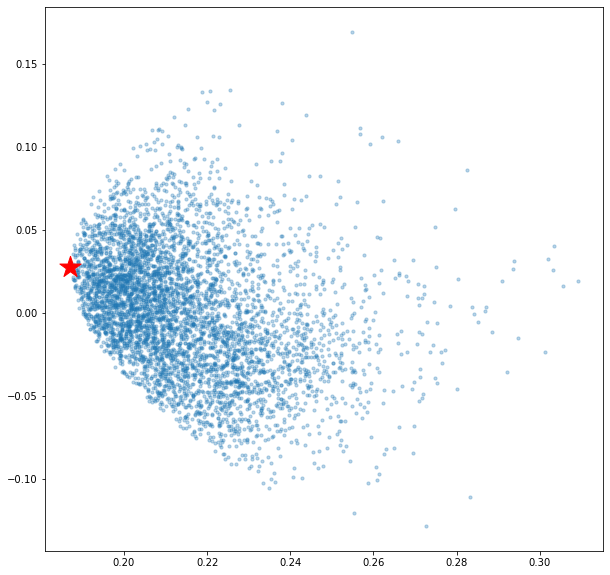

In [51]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

Sharpe Ratio = (Portfolio Return - risk-free rate) / portfolio standard deviation

### Optimal Risky Portfolio 

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

In [52]:
# Finding the optimal portfolio
rf = 0.01 # risk factor

#find the portfolio with the highest sharpe ratio using formula and idxmax()
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.169510
Volatility      0.254853
PGOLD weight    0.097780
AEV weight      0.003452
PHN weight      0.805642
SECB weight     0.059031
MWC weight      0.034095
Name: 3484, dtype: float64

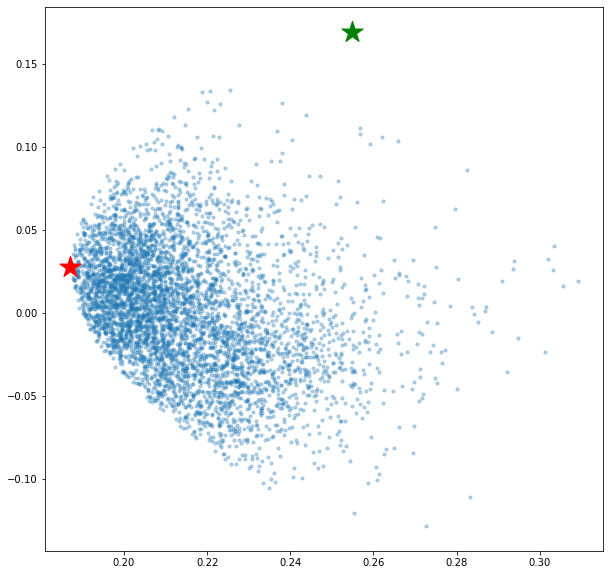

In [53]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)